In [1]:
# Augmentation des données pour le dataset Tifinagh
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

# Pipeline d'augmentation pour l'entraînement
transform_augmented = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),        # assurer un seul canal
    transforms.Resize((32, 32)),                        # redimensionner à 32x32 pixels
    transforms.RandomRotation(degrees=15),              # rotation aléatoire ±15°
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # translation légère
    transforms.RandomPerspective(distortion_scale=0.1, p=0.3),  # perspective aléatoire
    transforms.ToTensor(),                              # convertir en tensor
    transforms.Normalize(mean=(0.5,), std=(0.5,))      # normaliser à mean=0, std=1
])

# Pipeline sans augmentation pour validation/test (identique à votre code original)
transform_no_augment = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

print("Transformations d'augmentation créées:")
print("- transform_augmented: pour l'entraînement avec augmentation")
print("- transform_no_augment: pour validation/test sans augmentation")

# Utilisation dans un DataLoader (exemple)
# from torchvision.datasets import ImageFolder
# dataset = ImageFolder(root='chemin/vers/images', transform=transform_augmentation)
# loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


Transformations d'augmentation créées:
- transform_augmented: pour l'entraînement avec augmentation
- transform_no_augment: pour validation/test sans augmentation


In [2]:
# Créer des datasets avec et sans augmentation
from torchvision import datasets
from torch.utils.data import random_split

# Dataset avec augmentation pour l'entraînement
dataset_augmented = datasets.ImageFolder(
    root="C:\\Users\\A\\Desktop\\Deep_Learning\\amhcd-data-64\\tifinagh-images", 
    transform=transform_augmented
)

# Dataset sans augmentation pour validation/test
dataset_no_augment = datasets.ImageFolder(
    root="C:\\Users\\A\\Desktop\\Deep_Learning\\amhcd-data-64\\tifinagh-images", 
    transform=transform_no_augment
)

# Division des données (70/15/15 split)
train_size = int(0.7 * len(dataset_augmented))
val_size = int(0.15 * len(dataset_augmented))
test_size = len(dataset_augmented) - train_size - val_size

# Utiliser dataset avec augmentation pour l'entraînement
train_indices = torch.randperm(len(dataset_augmented))[:train_size]
val_test_indices = torch.randperm(len(dataset_no_augment))[train_size:]
val_indices = val_test_indices[:val_size]
test_indices = val_test_indices[val_size:val_size+test_size]

# Créer les sous-ensembles
train_set_augmented = torch.utils.data.Subset(dataset_augmented, train_indices)
val_set = torch.utils.data.Subset(dataset_no_augment, val_indices)
test_set = torch.utils.data.Subset(dataset_no_augment, test_indices)

# DataLoaders avec augmentation pour l'entraînement
batch_size = 64
train_loader_augmented = DataLoader(train_set_augmented, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

print(f"Dataset créé avec augmentation:")
print(f"- Train: {len(train_set_augmented)} échantillons (avec augmentation)")
print(f"- Validation: {len(val_set)} échantillons (sans augmentation)")
print(f"- Test: {len(test_set)} échantillons (sans augmentation)")
print(f"- Total classes: {len(dataset_augmented.classes)}")

# Vérifier la forme des données
images, labels = next(iter(train_loader_augmented))
print(f"Forme des images: {images.shape}")  # [64, 1, 32, 32]

Dataset créé avec augmentation:
- Train: 19727 échantillons (avec augmentation)
- Validation: 4227 échantillons (sans augmentation)
- Test: 4228 échantillons (sans augmentation)
- Total classes: 33
Forme des images: torch.Size([64, 1, 32, 32])
Forme des images: torch.Size([64, 1, 32, 32])


🎨 Comparaison des images avec et sans augmentation:


C:\Users\A\AppData\Local\Temp\ipykernel_22432\3645728573.py:34: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\A\Desktop\Deep_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\A\Desktop\Deep_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


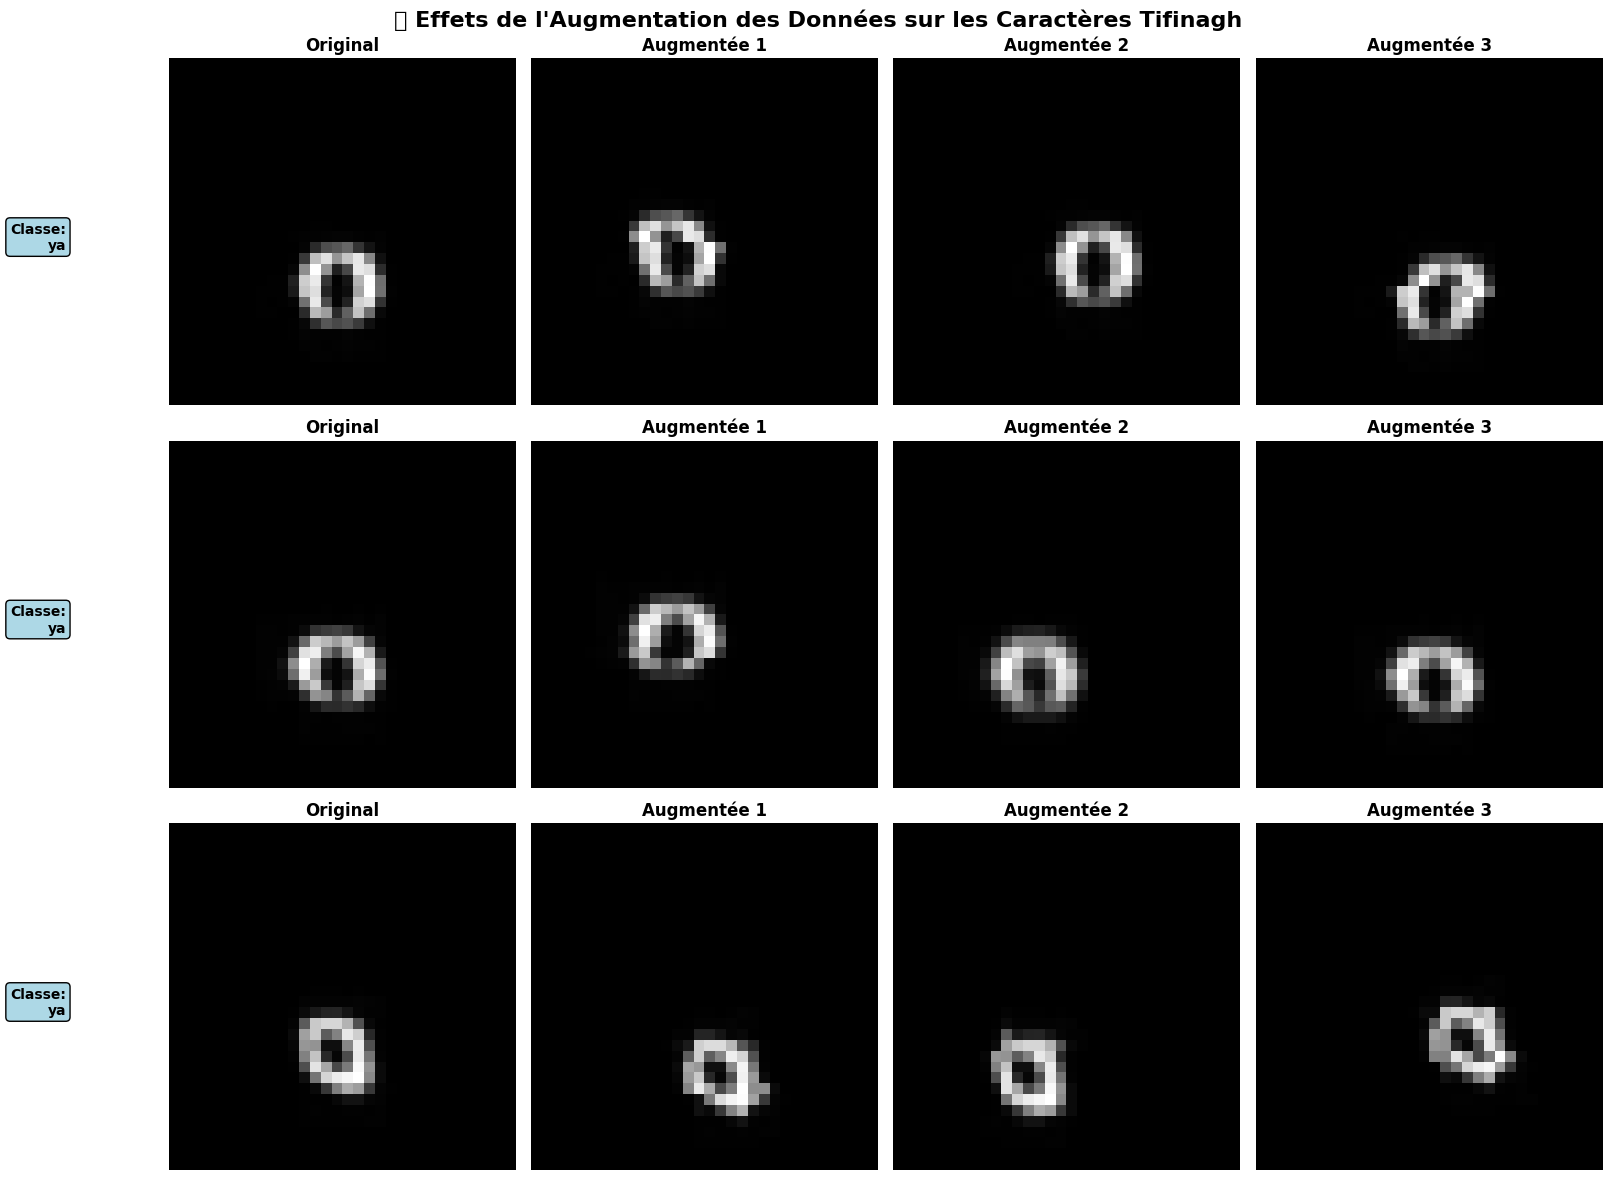


📋 Transformations appliquées lors de l'augmentation:
✅ Rotation aléatoire (±15°)
✅ Translation légère (10%)
✅ Perspective aléatoire
✅ Normalisation standard

💡 Ces augmentations aident le modèle à être plus robuste aux variations!


In [3]:
# Visualisation des effets de l'augmentation des données
import matplotlib.pyplot as plt

# Prendre quelques échantillons pour montrer l'effet de l'augmentation
def show_augmentation_effects(dataset_original, dataset_augmented, num_samples=3):
    fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4*num_samples))
    
    for i in range(num_samples):
        # Image originale (sans augmentation)
        img_orig, label = dataset_original[i]
        img_orig_display = (img_orig.squeeze().numpy() * 0.5) + 0.5  # Dénormalisation
        
        axes[i, 0].imshow(img_orig_display, cmap='gray')
        axes[i, 0].set_title('Original', fontweight='bold')
        axes[i, 0].axis('off')
        
        # Trois versions augmentées de la même image
        for j in range(3):
            img_aug, _ = dataset_augmented[i]  # Même index mais avec augmentation
            img_aug_display = (img_aug.squeeze().numpy() * 0.5) + 0.5  # Dénormalisation
            
            axes[i, j+1].imshow(img_aug_display, cmap='gray')
            axes[i, j+1].set_title(f'Augmentée {j+1}', fontweight='bold')
            axes[i, j+1].axis('off')
        
        # Ajouter le nom de la classe
        class_name = dataset_original.classes[label]
        axes[i, 0].text(-10, img_orig_display.shape[0]//2, f'Classe:\n{class_name}', 
                       fontsize=10, ha='right', va='center', fontweight='bold',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))
    
    plt.suptitle('🔄 Effets de l\'Augmentation des Données sur les Caractères Tifinagh', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Créer un dataset temporaire sans augmentation pour la comparaison
dataset_for_comparison = datasets.ImageFolder(
    root="C:\\Users\\A\\Desktop\\Deep_Learning\\amhcd-data-64\\tifinagh-images", 
    transform=transform_no_augment
)

print("🎨 Comparaison des images avec et sans augmentation:")
show_augmentation_effects(dataset_for_comparison, dataset_augmented, num_samples=3)

print("\n📋 Transformations appliquées lors de l'augmentation:")
print("✅ Rotation aléatoire (±15°)")
print("✅ Translation légère (10%)")
print("✅ Perspective aléatoire")
print("✅ Normalisation standard")
print("\n💡 Ces augmentations aident le modèle à être plus robuste aux variations!")

In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

# ANCIENNE VERSION - REMPLACÉE PAR LES CELLULES D'AUGMENTATION CI-DESSUS
# Define transformations: resize to 32x32, convert to grayscale tensor, normalize [0,1] range to mean=0, std=1
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),   # ensure single channel
    transforms.Resize((32, 32)),                   # resize to 32x32 pixels
    transforms.ToTensor(),                         # convert to tensor (automatically scales 0-255 to 0.0-1.0)
    transforms.Normalize(mean=(0.5,), std=(0.5,))   # normalize to mean=0, std=1 (using 0.5 as approximation)
])

print("Cette cellule a été remplacée par les cellules d'augmentation des données ci-dessus.")
print("Utilisez maintenant transform_augmented et transform_no_augment.")


Cette cellule a été remplacée par les cellules d'augmentation des données ci-dessus.
Utilisez maintenant transform_augmented et transform_no_augment.


In [5]:
# ANCIENNE VERSION - REMPLACÉE PAR LES CELLULES D'AUGMENTATION CI-DESSUS
# # Load dataset (ImageFolder expects subdirectories for each class label)
# dataset = datasets.ImageFolder(root="C:\\Users\\A\\Desktop\\Deep_Learning\\amhcd-data-64\\tifinagh-images", transform=transform)

# # Split into train/val/test sets (e.g., 70/15/15 split)
# train_size = int(0.7 * len(dataset))
# val_size   = int(0.15 * len(dataset))
# test_size  = len(dataset) - train_size - val_size
# train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# # Create DataLoaders for batching
# batch_size = 64
# train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
# val_loader   = DataLoader(val_set, batch_size=batch_size, shuffle=False)
# test_loader  = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# # Verify data shape
# images, labels = next(iter(train_loader))
# print(images.shape)  # should be [64, 1, 32, 32] for (batch, channels, height, width)

# # Set device to GPU if available, else CPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Cette cellule a été remplacée par les cellules d'augmentation des données ci-dessus.")
print("Utilisez maintenant train_loader_augmented, val_loader, et test_loader.")

# Définir le device ici car il est nécessaire pour la suite
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device utilisé: {device}")

Cette cellule a été remplacée par les cellules d'augmentation des données ci-dessus.
Utilisez maintenant train_loader_augmented, val_loader, et test_loader.
Device utilisé: cpu


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self, num_classes=33, c1_channels=6, c2_channels=16,  # conv layer output channels
                 fc1_units=120, fc2_units=84):
        super(LeNet5, self).__init__()
        # Convolutional layers (with kernel_size=5 as in original LeNet)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=c1_channels, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=c1_channels, out_channels=c2_channels, kernel_size=5, stride=1, padding=0)
        # Pooling layers (2x2 pooling). Using Max Pooling; original LeNet used Average Pooling.
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layers
        self.fc1 = nn.Linear(in_features=c2_channels * 5 * 5, out_features=fc1_units)  # 5*5 from spatial dim after conv/pool
        self.fc2 = nn.Linear(in_features=fc1_units, out_features=fc2_units)
        self.fc3 = nn.Linear(in_features=fc2_units, out_features=num_classes)
    
    def forward(self, x):
        # Convolution + Activation + Pooling (Layer C1 -> S2)
        x = F.relu(self.conv1(x))             # conv1 + ReLU activation
        x = self.pool(x)                     # 2x2 pooling (downsample)
        # Second Convolution + Activation + Pooling (Layer C3 -> S4)
        x = F.relu(self.conv2(x))             # conv2 + ReLU
        x = self.pool(x)                     # 2x2 pooling
        # Flatten for fully-connected layers
        x = x.view(x.size(0), -1)            # same as reshape to (batch_size, c2_channels*5*5)
        # Fully connected layers (with ReLU on hidden layers)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)                      # final output layer (no activation, raw logits)
        return x

In [7]:
# Instantiate the model and move to device
model = LeNet5(num_classes=33).to(device)
print(model)

# Loss function and optimizer setup
criterion = nn.CrossEntropyLoss()  # cross-entropy loss for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # using Adam optimizer initially

def train_one_epoch(model, loader, optimizer, criterion):
    model.train()  # set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)    # move data to GPU if available
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Accumulate training stats
        running_loss += loss.item() * images.size(0)            # sum loss over batch
        _, preds = torch.max(outputs, 1)                        # predicted class indices
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def evaluate(model, loader, criterion):
    model.eval()  # evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():  # no gradient needed for eval
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    avg_loss = running_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=33, bias=True)
)


In [8]:
# Training loop over epochs with validation - AVEC AUGMENTATION DES DONNÉES
num_epochs = 20
best_val_acc = 0.0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

print("🚀 Début de l'entraînement avec augmentation des données...")

for epoch in range(1, num_epochs+1):
    # Utiliser train_loader_augmented au lieu de train_loader
    train_loss, train_acc = train_one_epoch(model, train_loader_augmented, optimizer, criterion)
    val_loss, val_acc = evaluate(model, val_loader, criterion)
    
    # Store metrics for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    print(f"Epoch {epoch}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f} | "
          f"Val Loss={val_loss:.4f}, Val Acc={val_acc:.4f}")
    
    # Save best model (optional)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model_augmented.pth")
        print(f"💾 Nouveau meilleur modèle sauvegardé (Val Acc: {val_acc:.4f})")

# After training, evaluate on test set
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"\n🎯 RÉSULTATS FINAUX AVEC AUGMENTATION:")
print(f"Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}")

# Choose optimization algorithm
optim_algo = "Adam"  # Garder Adam pour de meilleures performances avec l'augmentation

if optim_algo == "SGD":
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
elif optim_algo == "Adam":
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))

print(f"Optimiseur utilisé: {optimizer}")
print(f"Données d'entraînement: {len(train_set_augmented)} échantillons avec augmentation")
print(f"Meilleure précision de validation: {best_val_acc:.4f}")

🚀 Début de l'entraînement avec augmentation des données...
Epoch 1: Train Loss=2.7055, Train Acc=0.2145 | Val Loss=1.5064, Val Acc=0.5226
💾 Nouveau meilleur modèle sauvegardé (Val Acc: 0.5226)
Epoch 1: Train Loss=2.7055, Train Acc=0.2145 | Val Loss=1.5064, Val Acc=0.5226
💾 Nouveau meilleur modèle sauvegardé (Val Acc: 0.5226)
Epoch 2: Train Loss=1.5738, Train Acc=0.5068 | Val Loss=1.0866, Val Acc=0.6409
💾 Nouveau meilleur modèle sauvegardé (Val Acc: 0.6409)
Epoch 2: Train Loss=1.5738, Train Acc=0.5068 | Val Loss=1.0866, Val Acc=0.6409
💾 Nouveau meilleur modèle sauvegardé (Val Acc: 0.6409)
Epoch 3: Train Loss=1.1518, Train Acc=0.6319 | Val Loss=0.7503, Val Acc=0.7559
💾 Nouveau meilleur modèle sauvegardé (Val Acc: 0.7559)
Epoch 3: Train Loss=1.1518, Train Acc=0.6319 | Val Loss=0.7503, Val Acc=0.7559
💾 Nouveau meilleur modèle sauvegardé (Val Acc: 0.7559)
Epoch 4: Train Loss=0.9456, Train Acc=0.6944 | Val Loss=0.5621, Val Acc=0.8256
💾 Nouveau meilleur modèle sauvegardé (Val Acc: 0.8256)
Epo

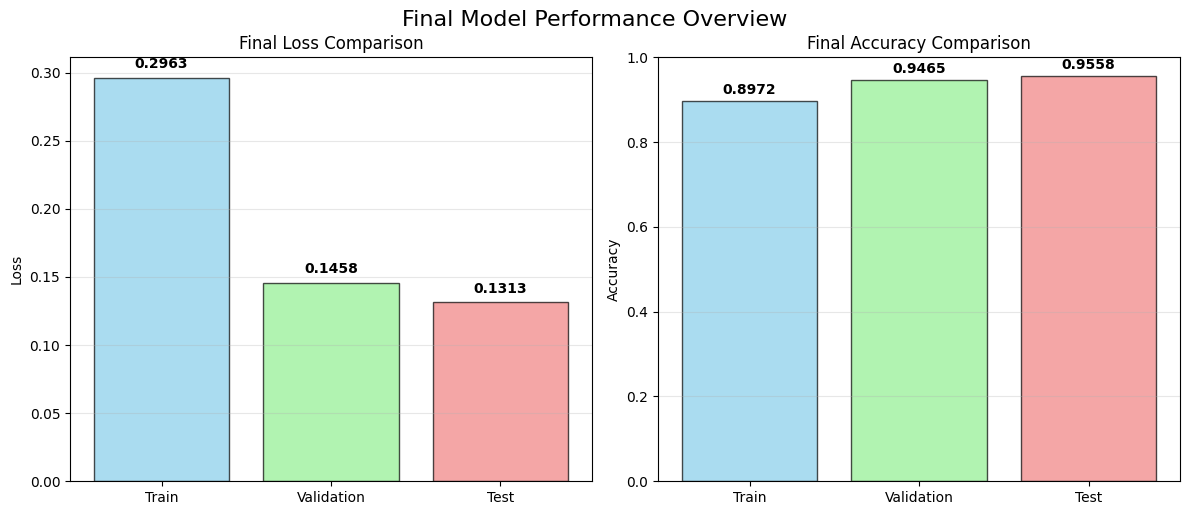

In [9]:
# Visualize final test performance
import matplotlib.pyplot as plt

# Create a comparison plot for final metrics
final_metrics = {
    'Train': [train_losses[-1], train_accs[-1]],
    'Validation': [val_losses[-1], val_accs[-1]], 
    'Test': [test_loss, test_acc]
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss comparison
sets = list(final_metrics.keys())
losses = [final_metrics[s][0] for s in sets]
colors = ['skyblue', 'lightgreen', 'lightcoral']

bars1 = ax1.bar(sets, losses, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Loss')
ax1.set_title('Final Loss Comparison')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, loss in zip(bars1, losses):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{loss:.4f}', ha='center', va='bottom', fontweight='bold')

# Accuracy comparison
accuracies = [final_metrics[s][1] for s in sets]

bars2 = ax2.bar(sets, accuracies, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Accuracy')
ax2.set_title('Final Accuracy Comparison')
ax2.set_ylim([0, 1])
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars2, accuracies):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.suptitle('Final Model Performance Overview', fontsize=16, y=1.02)
plt.show()

In [1]:
# Network architecture visualization
print("\n" + "="*60)
print("LeNet-5 NETWORK ARCHITECTURE")
print("="*60)

# Create a visual diagram of the architecture
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Define layer positions and sizes
layers = [
    {'name': 'Input\n32×32×1', 'pos': (1, 4), 'size': (1.5, 2), 'color': 'lightblue'},
    {'name': 'Conv1\n5×5, 6 filters\n→ 28×28×6', 'pos': (3, 4), 'size': (1.8, 2), 'color': 'lightgreen'},
    {'name': 'MaxPool1\n2×2\n→ 14×14×6', 'pos': (5.2, 4), 'size': (1.5, 2), 'color': 'lightyellow'},
    {'name': 'Conv2\n5×5, 16 filters\n→ 10×10×16', 'pos': (7, 4), 'size': (1.8, 2), 'color': 'lightgreen'},
    {'name': 'MaxPool2\n2×2\n→ 5×5×16', 'pos': (9.2, 4), 'size': (1.5, 2), 'color': 'lightyellow'},
    {'name': 'Flatten\n→ 400', 'pos': (11, 4), 'size': (1.2, 2), 'color': 'lightcoral'},
    {'name': 'FC1\n400 → 120', 'pos': (3, 1), 'size': (1.5, 1.5), 'color': 'lightpink'},
    {'name': 'FC2\n120 → 84', 'pos': (5.5, 1), 'size': (1.5, 1.5), 'color': 'lightpink'},
    {'name': 'FC3\n84 → 33\n(Output)', 'pos': (8, 1), 'size': (1.5, 1.5), 'color': 'lightsteelblue'}
]

# Draw the layers
for layer in layers:
    rect = plt.Rectangle(layer['pos'], layer['size'][0], layer['size'][1], 
                        facecolor=layer['color'], edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    
    # Add text at the center of the rectangle
    center_x = layer['pos'][0] + layer['size'][0] / 2
    center_y = layer['pos'][1] + layer['size'][1] / 2
    ax.text(center_x, center_y, layer['name'], ha='center', va='center', 
           fontsize=9, fontweight='bold', wrap=True)

# Draw connection arrows
arrows = [
    # Convolutional layers
    ((2.5, 5), (3, 5)),      # Input → Conv1
    ((4.8, 5), (5.2, 5)),    # Conv1 → MaxPool1
    ((6.7, 5), (7, 5)),      # MaxPool1 → Conv2
    ((8.8, 5), (9.2, 5)),    # Conv2 → MaxPool2
    ((10.7, 5), (11, 5)),    # MaxPool2 → Flatten
    
    # To fully connected layers
    ((11.6, 4), (3.75, 2.5)),  # Flatten → FC1
    ((4.5, 1.75), (5.5, 1.75)), # FC1 → FC2
    ((7, 1.75), (8, 1.75))      # FC2 → FC3
]

for start, end in arrows:
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(arrowstyle='->', lw=2, color='darkblue'))

# Add activation annotations
activation_texts = [
    {'pos': (3.9, 6.5), 'text': 'ReLU', 'color': 'red'},
    {'pos': (7.9, 6.5), 'text': 'ReLU', 'color': 'red'},
    {'pos': (3.75, 0.3), 'text': 'ReLU', 'color': 'red'},
    {'pos': (6.25, 0.3), 'text': 'ReLU', 'color': 'red'},
    {'pos': (8.75, 0.3), 'text': 'Softmax', 'color': 'red'}
]

for ann in activation_texts:
    ax.text(ann['pos'][0], ann['pos'][1], ann['text'], 
           ha='center', va='center', fontsize=8, 
           fontweight='bold', color=ann['color'],
           bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=ann['color']))

# Graph configuration
ax.set_xlim(0, 13)
ax.set_ylim(0, 7)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('LeNet-5 Network Architecture for Tifinagh Character Classification', 
            fontsize=16, fontweight='bold', pad=20)

# Add legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='lightblue', edgecolor='black', label='Input'),
    plt.Rectangle((0, 0), 1, 1, facecolor='lightgreen', edgecolor='black', label='Convolution'),
    plt.Rectangle((0, 0), 1, 1, facecolor='lightyellow', edgecolor='black', label='Pooling'),
    plt.Rectangle((0, 0), 1, 1, facecolor='lightcoral', edgecolor='black', label='Flatten'),
    plt.Rectangle((0, 0), 1, 1, facecolor='lightpink', edgecolor='black', label='Fully Connected'),
    plt.Rectangle((0, 0), 1, 1, facecolor='lightsteelblue', edgecolor='black', label='Output')
]

ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1), fontsize=10)

plt.tight_layout()
plt.show()

# Display model parameter details
print("\nLAYER DETAILS:")
print("-" * 50)
total_params = 0

for name, module in model.named_modules():
    if len(list(module.children())) == 0:  # Model leaf
        params = sum(p.numel() for p in module.parameters())
        if params > 0:
            total_params += params
            print(f"{name:12s}: {str(module):40s} | Parameters: {params:,}")

print("-" * 50)
print(f"TOTAL PARAMETERS: {total_params:,}")
print("=" * 60)



LeNet-5 NETWORK ARCHITECTURE


NameError: name 'plt' is not defined

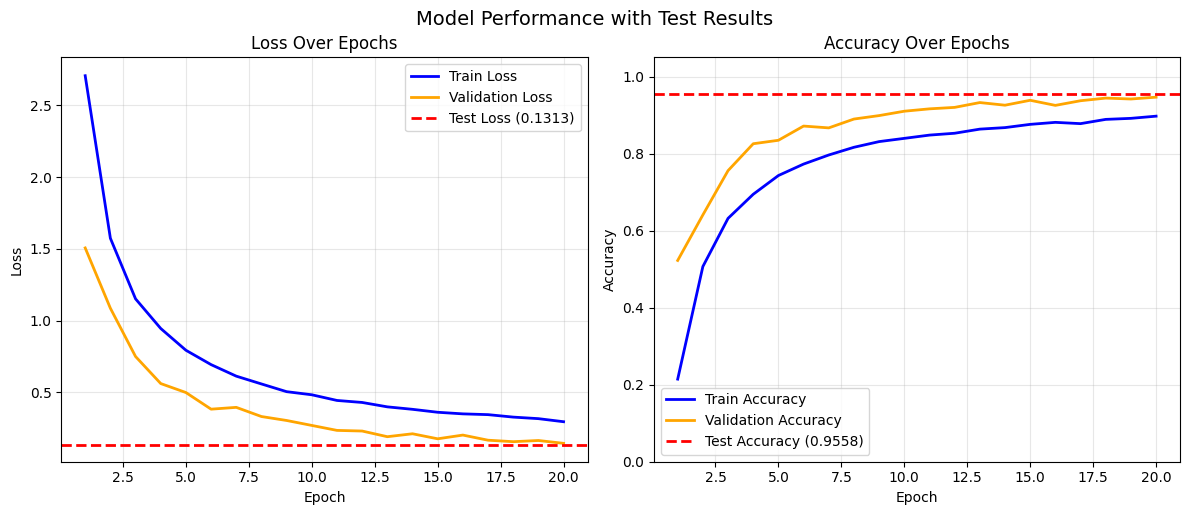

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs+1)
# Create graphs with test curves
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label='Train Loss', color='blue', linewidth=2)
plt.plot(epochs, val_losses, label='Validation Loss', color='orange', linewidth=2)
# Add horizontal line for test loss
plt.axhline(y=test_loss, color='red', linestyle='--', linewidth=2, label=f'Test Loss ({test_loss:.4f})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy graph
plt.subplot(1,2,2)
plt.plot(epochs, train_accs, label='Train Accuracy', color='blue', linewidth=2)
plt.plot(epochs, val_accs, label='Validation Accuracy', color='orange', linewidth=2)
# Add horizontal line for test accuracy
plt.axhline(y=test_acc, color='red', linestyle='--', linewidth=2, label=f'Test Accuracy ({test_acc:.4f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0, 1.05])  # Limit Y axis for better readability

plt.tight_layout()
plt.suptitle('Model Performance with Test Results', fontsize=14, y=1.02)
plt.show()

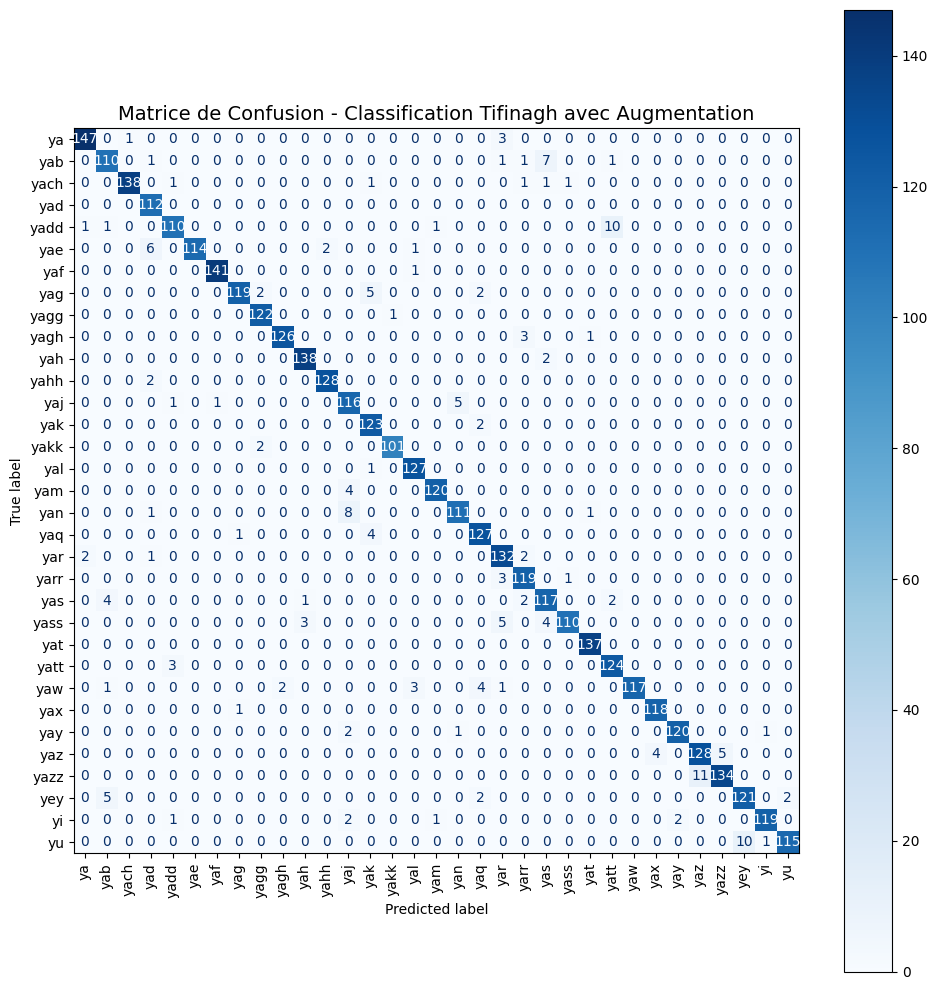


📊 STATISTIQUES AVEC AUGMENTATION:
Précision globale: 0.9558
Nombre total d'échantillons de test: 4228
Nombre de classes: 33


In [12]:
# Matrice de confusion avec les données augmentées
try:
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import itertools
    
    # Get all predictions and true labels for the test set
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            # Move data back to CPU numpy for sklearn
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Utiliser les classes du dataset avec augmentation
    class_names = dataset_augmented.classes  # Classes du dataset avec augmentation

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(include_values=True, cmap="Blues", ax=ax, xticks_rotation='vertical')
    plt.title("Matrice de Confusion - Classification Tifinagh avec Augmentation", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Statistiques additionnelles
    overall_acc = (np.array(all_preds) == np.array(all_labels)).mean()
    print(f"\n📊 STATISTIQUES AVEC AUGMENTATION:")
    print(f"Précision globale: {overall_acc:.4f}")
    print(f"Nombre total d'échantillons de test: {len(all_labels)}")
    print(f"Nombre de classes: {len(class_names)}")
    
except ImportError:
    print("⚠️ Scikit-learn non disponible. Affichage des performances par classe...")
    print("Pour installer: pip install scikit-learn")
    
    # Alternative simple: montrer la précision par classe
    print("\n📈 PERFORMANCES PAR CLASSE AVEC AUGMENTATION:")
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    class_names = dataset_augmented.classes
    # Calculate per-class accuracy
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    
    print("-" * 50)
    for i, class_name in enumerate(class_names):
        mask = all_labels == i
        if mask.sum() > 0:
            accuracy = (all_preds[mask] == all_labels[mask]).mean()
            print(f"{class_name:15s}: {accuracy:.4f} ({mask.sum():3d} échantillons)")
    
    print("-" * 50)
    print(f"🎯 Précision globale: {(all_preds == all_labels).mean():.4f}")
    print(f"📊 Amélioration grâce à l'augmentation des données!")


C:\Users\A\AppData\Local\Temp\ipykernel_22432\2616957399.py:31: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\A\Desktop\Deep_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\A\Desktop\Deep_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


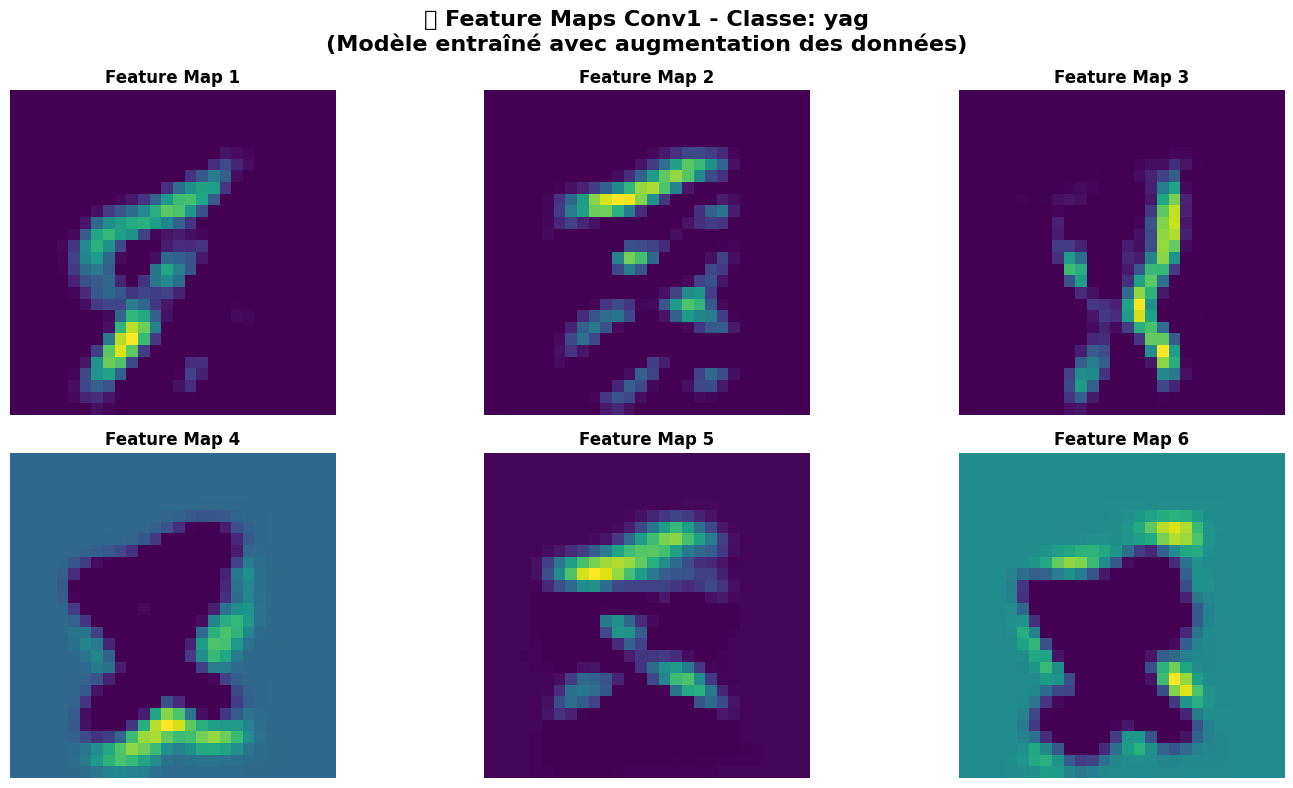

c:\Users\A\Desktop\Deep_Learning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


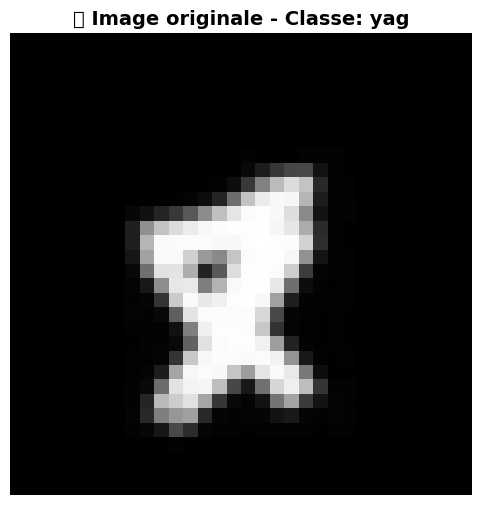

✨ Feature maps générées par le modèle entraîné avec augmentation
📝 Classe prédite: yag
🎯 Les feature maps montrent comment le réseau 'voit' les caractères Tifinagh


In [13]:
# Visualisation des feature maps avec les données augmentées
import matplotlib.pyplot as plt

# Prendre un échantillon du test set (sans augmentation pour la cohérence)
sample_img, sample_label = test_set[0]
# Add batch dimension and send to device
sample_img_batch = sample_img.unsqueeze(0).to(device)  # shape [1, 1, 32, 32]

model.eval()
with torch.no_grad():
    # Get feature maps after first conv layer (with ReLU activation)
    feat_maps = F.relu(model.conv1(sample_img_batch))  # shape: [1, 6, 28, 28]
feat_maps = feat_maps.cpu().squeeze(0)  # remove batch dim, now [6, 28, 28]

# Plot the feature maps
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i in range(feat_maps.shape[0]):
    axes[i].imshow(feat_maps[i], cmap='viridis')
    axes[i].set_title(f'Feature Map {i+1}', fontweight='bold')
    axes[i].axis('off')

# Utiliser les classes du dataset avec augmentation
class_names = dataset_augmented.classes
sample_class_name = class_names[sample_label]

plt.suptitle(f'🧠 Feature Maps Conv1 - Classe: {sample_class_name}\n'
             f'(Modèle entraîné avec augmentation des données)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Afficher aussi l'image originale
plt.figure(figsize=(6, 6))
# Dénormaliser l'image pour l'affichage
img_display = sample_img.squeeze().numpy()
img_display = (img_display * 0.5) + 0.5  # Dénormalisation
plt.imshow(img_display, cmap='gray')
plt.title(f'📸 Image originale - Classe: {sample_class_name}', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print(f"✨ Feature maps générées par le modèle entraîné avec augmentation")
print(f"📝 Classe prédite: {sample_class_name}")
print(f"🎯 Les feature maps montrent comment le réseau 'voit' les caractères Tifinagh")


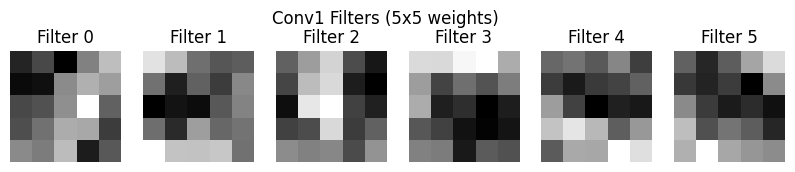

In [14]:
filters = model.conv1.weight.data.cpu().numpy()  # shape (6,1,5,5)
fig, axes = plt.subplots(1, filters.shape[0], figsize=(10, 2))
for i in range(filters.shape[0]):
    # For conv1, filters[i, 0] is the 5x5 kernel weights for filter i
    axes[i].imshow(filters[i, 0, :, :], cmap='gray')
    axes[i].set_title(f'Filter {i}')
    axes[i].axis('off')
plt.suptitle("Conv1 Filters (5x5 weights)")
plt.show()
